In [2]:
##Fit multi trait multi environment models using BMTME package

.libPaths(c('/home/ssapkot/.conda/envs/r_env_360/lib', .libPaths()))

#install.packages("BMTME",repos='http://cran.us.r-project.org', dependencies = TRUE)
library(BGLR)
library(lme4)
#library(doMC)
#library(foreach)
library(coda)
library(tidyverse)
library(ggplot2)
library(BMTME)

setwd("/panicle/ssapkot/git_repo/GrainComp_GS/")

In [8]:
load('data//BTx642_BMTME.RData')
head(phenoBMTME)


Taxa,Year,Location,Env,Amylose,Fat,GrossEnergy,Protein,Starch
CS_001,2014,SC,SC2014,1.9547130,0.03304815,4.046921,0.01966221,0.4710340
CS_001,2014,TX,TX2014,0.6614585,0.54251499,-2.651474,-1.58389855,1.7596910
CS_001,2015,SC,SC2015,1.7416722,0.45904592,8.055000,-0.39665278,0.1503197
CS_001,2015,TX,TX2015,1.7382022,0.45950193,8.068892,-0.39545526,0.1476326
CS_002,2014,SC,SC2014,1.8355414,-0.45044256,-5.717534,-0.81239300,1.5925011
CS_002,2014,TX,TX2014,-1.0908355,0.05968405,4.710492,-0.71413668,0.7813265


In [8]:
### Compile BME / BMT model fit
traits <- c('Amylose','Fat','GrossEnergy','Protein','Starch')
# pops <- c('SAP','BTx642')

# total <- c()
# for (j in 1: length(pops)){
pop <- 'BTx642' #pops[j]

setwd('/scratch2/ssapkot/GrainComp/BTx642/BME/')
COV_T <- c()
COV_R <- c()
for (i in 1:length(traits)){
    covt <- c()
    covr <- c()
    trait <- traits[i]
    df <- paste0(pop,'_BME_',trait,'_Model.rds')
    if (file.exists(df))
         pm <- readRDS(file=df)
        print(pm$beta)
        covt <- pm$varTrait
        covr <- pm$vare
        
        COV_T[[i]] <- covt
        COV_R[[i]] <- covr
        }
    COV_T
    COV_R

    
    #write.csv(total, file="results/BME_complete_results.csv", row.names=FALSE)



     Amylose_2014_SC Amylose_2015_SC Amylose_2014_TX Amylose_2015_TX
[1,]         -0.0526         -0.0479         -0.0398          -0.049
     Fat_2014_SC Fat_2015_SC Fat_2014_TX Fat_2015_TX
[1,]     -0.0101     -0.0013     -0.0014      -5e-04
     GrossEnergy_2014_SC GrossEnergy_2015_SC GrossEnergy_2014_TX
[1,]             -0.2512             -0.1164             -0.3171
     GrossEnergy_2015_TX
[1,]             -0.0786
     Protein_2014_SC Protein_2015_SC Protein_2014_TX Protein_2015_TX
[1,]         -0.0203         -0.0214          -0.025         -0.0205
     Starch_2014_SC Starch_2015_SC Starch_2014_TX Starch_2015_TX
[1,]         0.0425         0.0365         0.0402         0.0339


Amylose_2014_SC,Amylose_2015_SC,Amylose_2014_TX,Amylose_2015_TX
3.1814,0.0442,3.1340,0.0442
0.0442,0.0711,0.0609,0.0710
3.1340,0.0609,3.4932,0.0608
0.0442,0.0710,0.0608,0.0709
Fat_2014_SC,Fat_2015_SC,Fat_2014_TX,Fat_2015_TX
0.0312,0.0123,0.0250,0.0123
0.0123,0.0109,0.0120,0.0109
0.0250,0.0120,0.0355,0.0120
0.0123,0.0109,0.0120,0.0109
GrossEnergy_2014_SC,GrossEnergy_2015_SC,GrossEnergy_2014_TX,GrossEnergy_2015_TX


Amylose_2014_SC,Amylose_2015_SC,Amylose_2014_TX,Amylose_2015_TX
4.4479,2.4435,3.8950,2.4404
2.4435,6.6476,3.7472,6.6385
3.8950,3.7472,5.4874,3.7422
2.4404,6.6385,3.7422,6.6295
Fat_2014_SC,Fat_2015_SC,Fat_2014_TX,Fat_2015_TX
0.1218,0.0633,0.0981,0.0632
0.0633,0.1126,0.0953,0.1124
0.0981,0.0953,0.1667,0.0952
0.0632,0.1124,0.0952,0.1123
GrossEnergy_2014_SC,GrossEnergy_2015_SC,GrossEnergy_2014_TX,GrossEnergy_2015_TX


In [20]:
## Convert Starch protein to per grain values
df <- read.csv("data/SAP_multiyear_agronomic_composition.csv")
head(df)
df2 <- df %>% transmute( Amylose = Amylose * TGW/1000, Protein = Protein * TGW/1000, Starch = Starch * TGW/1000, Fat = Fat * TGW/1000, Gross_Energy = Cal.g * TGW/1000)
df2 <- cbind(df[,1:4],df2)
head(df2)
write.csv(df2, file='/panicle/ssapkot/git_repo/GrainComp_GS/data/SAP_GrainComp_PerGrain_Complete.csv',row.names=FALSE)


Taxa,Location,Year,Rep,DTA,PH,GNP,TGW,YPP,ADF,...,Mg,Mn,Moisture,NDF,N.mg,P,Prolamin,Protein,Starch,Zn
PI17548,SC,2013,1,62,240,1269,15.1,21.0,6.61,...,1554,14.53,10.89,9.36,8.82,0.355,4.67,10.71,66.7,19.48
PI24969,SC,2013,1,71,227,2067,31.5,66.3,3.84,...,1395,14.05,11.16,6.80,8.83,0.331,4.37,11.05,72.2,18.24
PI34911,SC,2013,1,NA,196,697,29.8,18.9,5.81,...,1313,12.95,10.97,9.69,8.47,0.312,4.32,10.49,71.1,17.00
PI35038,SC,2013,1,71,199,1328,12.8,18.8,7.33,...,1541,14.95,10.76,10.25,9.60,0.359,4.90,11.55,65.2,20.21
PI48770,SC,2013,1,52,158,481,28.8,14.7,7.46,...,1582,15.03,11.07,6.48,10.76,0.378,5.12,13.20,67.6,22.68
PI152651,SC,2013,1,64,192,1791,23.2,44.7,4.01,...,1339,12.83,10.85,7.53,7.23,0.302,3.77,9.03,73.9,17.37


Taxa,Location,Year,Rep,Amylose,Protein,Starch,Fat,Gross_Energy
PI17548,SC,2013,1,0.27029,0.161721,1.00717,0.058135,62.9972
PI24969,SC,2013,1,0.45360,0.348075,2.27430,0.074655,127.5435
PI34911,SC,2013,1,0.50064,0.312602,2.11878,0.075990,121.4946
PI35038,SC,2013,1,0.20480,0.147840,0.83456,0.043776,53.2352
PI48770,SC,2013,1,0.44064,0.380160,1.94688,0.063072,117.4752
PI152651,SC,2013,1,0.30160,0.209496,1.71448,0.056608,93.5656


In [8]:
pm <- readRDS(file = '/panicle/ssapkot/git_repo/GrainComp_GS/results/SAP_all_multiTrait_CV5.rds')

# names(phenoBME)[names(phenoBME) == "Cal.g2013"] <- "Gross_Energy2013"
# names(phenoBME)[names(phenoBME) == "Cal.g2014"] <- "Gross_Energy2014"
# names(phenoBME)[names(phenoBME) == "Cal.g2017"] <- "Gross_Energy2017"
#phenoBMTME <- phenoBMTME[,c(1:4,6,9,10)]
#phenoBME <- phenoBME[,c(1:7,11:13,20:25)]
# head(phenoBMTME)
# head(phenoBME)
summary(pm)
res <- summary(pm, information='complete')
dim(res)
head(res)
# traits <- colnames(phenoBME[,-1])
# traits
#write.csv(res, file='/panicle/ssapkot/git_repo/GrainComp_GS/results/SAP_MTusingBLUPs.txt', row.names=FALSE)


#save(phenoBME,phenoBMTME, geno, file='/panicle/ssapkot/git_repo/GrainComp_GS/data/SAP_BMTME.RData')

Environment,Trait,Pearson,SE_Pearson,MAAPE,SE_MAAPE
,Amylose,0.3098,0.0399,0.7563,0.0151
,Fat,0.3951,0.0700,0.7633,0.0252
,Gross_Energy,0.5775,0.0296,0.6978,0.0138
,Protein,0.4023,0.0449,0.7588,0.0153
,Starch,0.5747,0.0291,0.7001,0.0132


[1] 25  5

Environment,Trait,Partition,Pearson,MAAPE
,Amylose,1,0.2234,0.7878
,Amylose,2,0.2439,0.7741
,Amylose,3,0.3010,0.7499
,Amylose,4,0.4492,0.7685
,Amylose,5,0.3315,0.7011
,Fat,1,0.3318,0.7374


In [ ]:
pheno <- phenoBMTME
Y <- as.matrix(pheno[, c('Amylose','Fat','GrossEnergy','Protein','Starch')])


LG <- cholesky(geno) ##cholesky decomposition of genomic matrix for design matrices
ZG <- model.matrix(~0 + as.factor(pheno$Taxa))
Z.G <- ZG %*% LG
Z.E <- model.matrix(~0 + as.factor(pheno$Env))
#colnames(Z.E) <- c("2013","2014","2017")
ZEG <- model.matrix(~0 + as.factor(pheno$Taxa):as.factor(pheno$Env))
G2 <- kronecker(diag(length(unique(pheno$Env))), data.matrix(geno))
LG2 <- cholesky(G2)
Z.EG <- ZEG %*% LG2

ETA <- list(Env = list(X = Z.E, model = 'BRR'), Gen = list(X = Z.G, model = 'BRR'), EnvGen = list(X = Z.EG, model = 'BRR'))
pheno2 <- data.frame(GID = pheno[, 1], Env = pheno[,4], Response = Y[,2])
CrossV <- CV.KFold(pheno2, DataSetID='GID', K=5, set_seed = 123)
pm1 <- BMORS(Y, ETA = ETA, nIter = 20000, burnIn = 10000, thin = 1, progressBar = TRUE, testingSet = CrossV, digits = 4)

Estimating covariates  [>-----------]  8%;  Time elapsed:  3m - time left: 32m

In [4]:
### Multi-trait results 
load('data/SAP_GrainComp.RData')
head(Y)

Taxa,Amylose,Gross_Energy,Fat,IVSD,Protein,Starch
PI152651,-0.1538549,-38.6698124,-0.002344321,1.2504996,-0.8249842,1.915682
PI17548,0.7867239,73.0951999,0.717994292,-2.9795743,-0.3074813,-2.365520
PI24969,-0.9926411,-56.8525571,-0.215062107,1.6950718,-0.8688983,2.490460
PI329435,-0.4490127,5.5069945,-0.054850610,1.4606610,1.1386032,-1.095568
PI329440,0.2774078,-0.2769026,-0.003690636,0.7909159,-0.1399243,1.155535
PI34911,-0.5313087,-65.6768572,-0.535485101,-0.7818304,-1.3908487,3.090577


In [90]:
### MultiTrait using SPG
setwd('/panicle/ssapkot/GrainComp/')
print("BTx642 Multi-Trait Model for GPS")
pm <- readRDS('results/BMTME/BMT/BTx642_GPS_multiTrait_CV5.rds')
summary(pm)
#boxplot(pm)
# print("BTx642 Multi-Trait Model for GPS")
# pm <- readRDS('results/BMTME/BMT/BTx642_GPS_multiTrait_CV5.rds')
# summary(pm)
# #boxplot(pm)

print("GSDP Multi-Trait Model for GPS")
pm <- readRDS('results/BMTME/BMT/SAP_GPS_multiTrait_CV5.rds')
summary(pm)
#boxplot(pm)

print("GSDP Multi-Trait Model all")
pm <- readRDS('results/BMTME/BMT/SAP_all_multiTrait_CV5.rds')
summary(pm)
#boxplot(pm)
setwd('../../git_repo/GrainComp_GS')

[1] "BTx642 Multi-Trait Model for GPS"


Environment,Trait,Pearson,SE_Pearson,MAAPE,SE_MAAPE
,Gross_Energy,0.6374,0.0403,0.6776,0.0211
,Protein,0.5424,0.0461,0.7185,0.0206
,Starch,0.5420,0.0463,0.7138,0.0160


[1] "GSDP Multi-Trait Model for GPS"


Environment,Trait,Pearson,SE_Pearson,MAAPE,SE_MAAPE
,Gross_Energy,0.5839,0.0287,0.6956,0.0140
,Protein,0.4112,0.0436,0.7543,0.0149
,Starch,0.5802,0.0257,0.7028,0.0116


[1] "GSDP Multi-Trait Model all"


Environment,Trait,Pearson,SE_Pearson,MAAPE,SE_MAAPE
,Amylose,0.3098,0.0399,0.7563,0.0151
,Fat,0.3951,0.0700,0.7633,0.0252
,Gross_Energy,0.5775,0.0296,0.6978,0.0138
,Protein,0.4023,0.0449,0.7588,0.0153
,Starch,0.5747,0.0291,0.7001,0.0132


In [52]:
### SAP Multi-Environment (BME) by traits
print("SAP Amylose")
pm <- readRDS('/scratch2/ssapkot/GrainComp/SAP/BME/SAP_BME_CV5_Amylose.rds')
pm
#boxplot(pm)

# print("SAP Protein")
# load('results/BMTME/BME/SAP_BME_CV5_Protein.RData')
# summary(pm)

# print("SAP Gross Energy")
# load('results/BMTME/BME/SAP_BME_CV5_Cal.g.RData')
# summary(pm)
# #boxplot(pm)

[1] "SAP Amylose"


Fitted Bayesian Multi Environment model with: 
 20000  Iterations, burning the first  10000  and thining every  1 
 Runtime:  19544.23  seconds 

 Predictive capacity of the model: 
   Environment        Trait  Pearson  SE_Pearson  MAAPE  SE_MAAPE
1               Amylose2013    0.140       0.028    NaN        NA
2               Amylose2014    0.378       0.052  0.758        NA
3               Amylose2017    0.072       0.032    NaN        NA

 Use str() function to found more detailed information.

In [60]:
df = load('data/BTx642_BMTME_GrainComp.RData')

str(df)
# cols <- grep('2014_SC', colnames(phenoBME))
# pheno <- phenoBME[,c(1,cols)]
# head(pheno)
#names(phenoBMTME)[names(phenoBMTME) == "GrossEnergy"] <- "Gross_Energy"
head(phenoBMTME)

#save(geno, phenoBME, phenoBMTME, file='data/BTx642_BMTME_GrainComp.RData')

 chr [1:3] "geno" "phenoBME" "phenoBMTME"


Taxa,Year,Location,Env,Amylose,Fat,Gross_Energy,Protein,Starch
CS_001,2014,SC,SC2014,2.0119744,0.04197640,6.064143,0.04101438,0.4313987
CS_001,2014,TX,TX2014,0.7039188,0.54651292,-0.724332,-1.55099355,1.7188070
CS_001,2015,SC,SC2015,1.7839549,0.46063334,27.529339,-0.38200064,0.1120119
CS_001,2015,TX,TX2015,1.7798816,0.46110133,NA,NA,NA
CS_002,2014,SC,SC2014,1.8922500,-0.44252256,-30.812081,-0.78770421,1.5593251
CS_002,2014,TX,TX2014,-1.0848323,0.06174904,3.443291,-0.68597324,0.7400663


## BMTME results for SAP

In [62]:
load('data/SAP_BMTME.RData')
head(phenoBMTME)
geno[1:5,1:5]

Taxa,Env,Amylose,Gross_Energy,Fat,Protein,Starch
PI152651,2013,-1.3060412,-37.771799414,-0.03942292,-1.2111684,2.766715
PI152651,2014,-0.1518703,-74.202741707,-0.28741472,-2.4092873,5.018051
PI152651,2017,0.6994863,0.003383857,0.29731826,0.9393867,-2.674919
PI17548,2013,0.6693859,79.014215976,1.16385960,-0.2071979,-1.923487
PI17548,2014,0.9697520,45.823305424,0.59492514,-0.8695028,-1.801738
PI17548,2017,1.1821377,72.282107274,0.28326927,0.2556282,-2.883531


,PI152651,PI17548,PI24969,PI329435,PI329440
PI152651,1.0505116,0.6732209,0.7492774,0.7293042,0.7481660
PI17548,0.6732209,1.0505116,0.6392398,0.6503776,0.6740134
PI24969,0.7492774,0.6392398,1.0305900,0.6743651,0.7078914
PI329435,0.7293042,0.6503776,0.6743651,1.0263177,0.7020762
PI329440,0.7481660,0.6740134,0.7078914,0.7020762,1.0221252


In [17]:
### BMORS scripts
pheno <- data.frame(GID = phenoBMTME[, 1], Env = phenoBMTME[, 2], Response = phenoBMTME[, 3])
#CrossV <- CV.KFold(pheno, DataSetID = 'GID', K = 5, set_seed = 123)
ETA <- list(Env = list(X = Z.E, model = 'BRR'), Gen = list(X = Z.G, model = 'BRR'), EnvGen = list(X = Z.EG, model = 'BRR'))
CrossValidation <- CV.RandomPart(pheno, NPartitions = 10, PTesting = 0.2, set_seed = 123)
#pm <- BMORS(Y, ETA = ETA, nIter = 25000, burnIn = 10000, thin = 2, progressBar = TRUE, testingSet = CrossValidation, digits = 4)

In [15]:
print("BMORS SAP CV-5")
pm = readRDS(file = '/panicle/ssapkot/GrainComp/results/BMTME/BMORS/SAP_allPheno_BMORS_CV5.rds')
res <- summary(pm)
res
#write.csv(res, 'results/BMTME/Manuscript_results/SAP_allPheno_BMORS_CV5.csv')
# df <- res %>% group_by(Trait) %>% summarize(overall_mean = mean(Pearson, na.rm=TRUE))
# df
# # summary(pm)
# # boxplot(pm)
# ggplot(res, aes(x=Trait, y=Pearson, fill=Environment)) + geom_boxplot() + theme_bw()

[1] "BMORS SAP CV-5"


Environment,Trait,Pearson,SE_Pearson,MAAPE,SE_MAAPE
2013,Amylose,0.3429,0.0824,NaN,NA
2013,Fat,0.6131,0.0479,NaN,NA
2013,Gross_Energy,0.7316,0.0250,NaN,NA
2013,Protein,0.5741,0.0405,NaN,NA
2013,Starch,0.5988,0.0417,NaN,NA
2014,Amylose,0.4263,0.0393,NaN,NA
2014,Fat,0.6899,0.0280,NaN,NA
2014,Gross_Energy,0.7747,0.0148,NaN,NA
2014,Protein,0.6153,0.0182,NaN,NA
2014,Starch,0.6518,0.0427,NaN,NA


In [17]:
print("BMORS SAP CV-5 per grain values")
pm = readRDS(file = 'results/SAP_perGrain_BMORS_CV5_123.rds')
res <- summary(pm, information='complete')
res
write.csv(res, 'results/SAP_perGrain_BMORS_CV5_123.csv')

[1] "BMORS SAP CV-5 per grain values"


Environment,Trait,Partition,Pearson,MAAPE
2013,Amylose,1,0.6684,NA
2013,Amylose,2,0.6284,NA
2013,Amylose,3,0.5960,NA
2013,Amylose,4,0.6042,NA
2013,Amylose,5,0.5937,NA
2013,Fat,1,0.6342,NA
2013,Fat,2,0.5605,NA
2013,Fat,3,0.4723,NA
2013,Fat,4,0.4394,NA
2013,Fat,5,0.5113,NA


[1] "BMORS SAP CV Environments"


Trait,overall_mean
Amylose,0.2759000
Fat,0.6337000
Gross_Energy,0.7555333
Protein,0.5784000
Starch,0.6268667


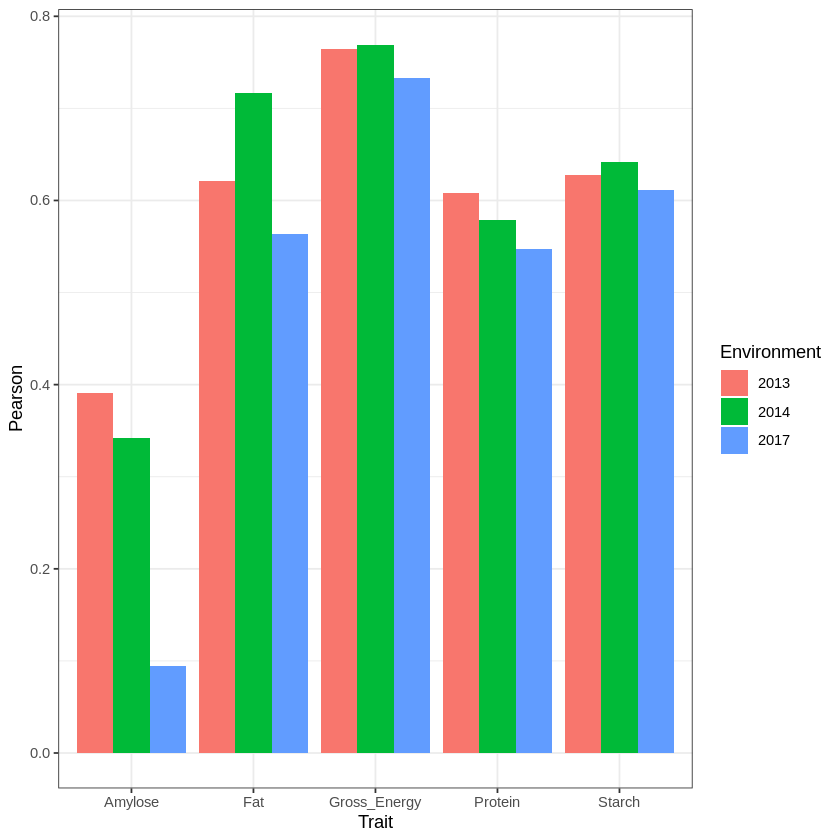

In [83]:
print("BMORS SAP CV Environments")
pm = readRDS(file = 'results/BMTME/SAP_all_BMORS_CV-ENV.rds')
#summary(pm, information='complete')
# summary(pm)
# boxplot(pm)
res <- summary(pm, information='complete')
#write.csv(res, 'results/BMTME/Manuscript_results/SAP_allPheno_BMORS_CV-Env.csv')

df <- res %>% group_by(Trait) %>% summarize(overall_mean = mean(Pearson, na.rm=TRUE))
df
ggplot(res, aes(x=Trait, y=Pearson, fill=Environment)) + geom_bar(stat="identity", position=position_dodge()) + theme_bw()
#ggplot(res, aes(x=Trait, y=MAAPE, fill=Environment)) + geom_bar(stat="identity", position=position_dodge()) + theme_bw()

[1] "BMORS BTx642 CV-5"


Trait,overall_mean
Amylose,0.7628000
Fat,0.7486600
GrossEnergy,0.6696933
Protein,0.6661200
Starch,0.6294400


Warning message:
“Removed 15 rows containing non-finite values (stat_boxplot).”

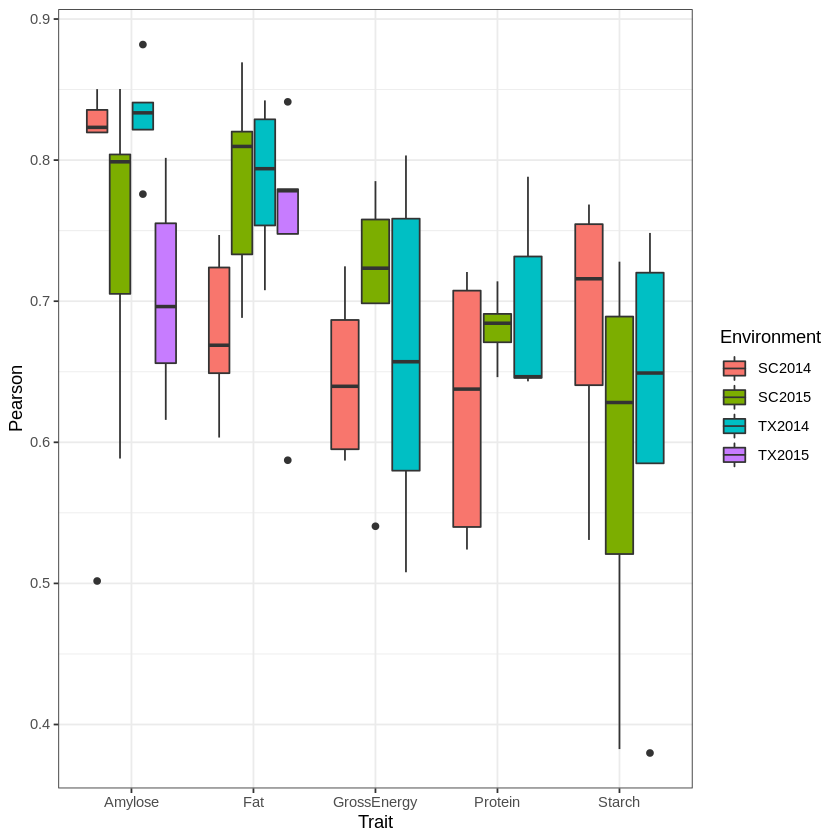

In [84]:
print("BMORS BTx642 CV-5")
pm = readRDS(file = 'results/BMTME/BTx642_allPheno_BMORS_CV5.rds')
#summary(pm, information='complete')
# summary(pm)
# boxplot(pm)
res <- summary(pm, information='complete')
#write.csv(res, 'results/BMTME/Manuscript_results/BTx642_allPheno_BMORS_CV5.csv')

df <- res %>% group_by(Trait) %>% summarize(overall_mean = mean(Pearson, na.rm=TRUE))
df

ggplot(res, aes(x=Trait, y=Pearson, fill=Environment)) + geom_boxplot() + theme_bw()

[1] "BMORS BTx642 CV-Environments"


Trait,overall_mean
Amylose,0.7514250
Fat,0.7876500
Gross_Energy,0.6808000
Protein,0.6472333
Starch,0.6344333


Warning message:
“Removed 3 rows containing missing values (geom_bar).”

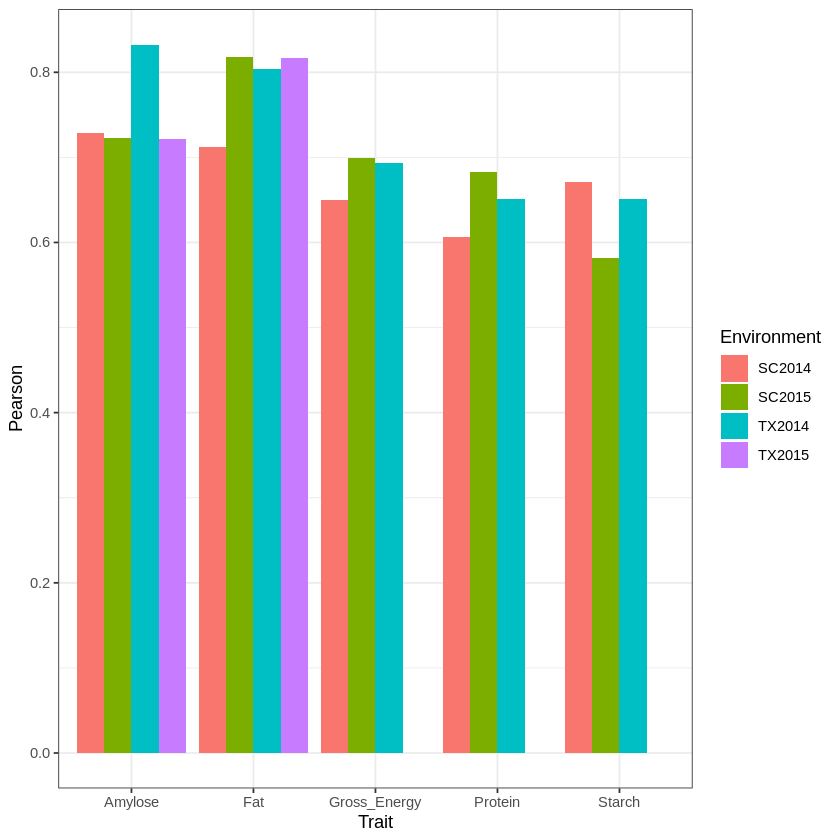

In [85]:
print("BMORS BTx642 CV-Environments")
pm = readRDS(file = 'results/BMTME/BTx642_all_BMORS_CV-ENV.rds')
#summary(pm, information='complete')
# summary(pm)
# boxplot(pm)
res <- summary(pm, information='complete')
#write.csv(res, 'results/BMTME/Manuscript_results/BTx642_allPheno_BMORS_CV-Env.csv')
df <- res %>% group_by(Trait) %>% summarize(overall_mean = mean(Pearson, na.rm=TRUE))
df
ggplot(res, aes(x=Trait, y=Pearson, fill=Environment)) + geom_bar(stat="identity", position=position_dodge()) + theme_bw()
#ggplot(res, aes(x=Trait, y=MAAPE, fill=Environment)) + geom_bar(stat="identity", position=position_dodge()) + theme_bw()

In [10]:
#fm <- readRDS('results/BMTME/SAP_allPheno_BMTME_model.rds')

In [87]:

load('data/SAP_BMTME.RData')

pheno = phenoBMTME
taxa <- unique(pheno$Taxa)
#rownames(G) = taxa
#colnames(G) = taxa
head(pheno)

LG <- cholesky(geno) ##cholesky decomposition of genomic matrix for design matrices
ZG <- model.matrix(~0 + as.factor(pheno$Taxa))
Z.G <- ZG %*% LG
Z.E <- model.matrix(~0 + as.factor(pheno$Env))
ZEG <- model.matrix(~0 + as.factor(pheno$Taxa):as.factor(pheno$Env))
G2 <- kronecker(diag(length(unique(pheno$Env))), data.matrix(geno))
LG2 <- cholesky(G2)
Z.EG <- ZEG %*% LG2

Y <- as.matrix(pheno[, c('Amylose','Fat','Gross_Energy','Protein','Starch')])
results <- c()
ETA <- list(Env = list(X = Z.E, model = 'BRR'), Gen = list(X = Z.G, model = 'BRR'), EnvGen = list(X = Z.EG, model = 'BRR'))

for (i in 12345:12374){
        seed <- i
        pheno2 <- data.frame(GID = pheno[, 1], Env = pheno[, 2], Response = pheno[, 4])
        CrossV <- CV.KFold(pheno2, DataSetID='GID', K=5, set_seed = seed)
        pm <- BMORS(Y, ETA = ETA, nIter = 150, burnIn = 50, thin = 2, progressBar = TRUE, testingSet = CrossV, digits = 4)
        res <- cbind(seed,summary(pm, information='complete'))
    results <- rbind(results,res)
    }
head(results)
    

    
#dataset <- as.matrix(pheno[, c('Year','Amylose','Fat','Gross_Energy','Protein','Starch')])
#colnames(dataset) <- c('Env','Amylose','Fat','Gross_Energy','Protein','Starch')
#pm <- BMORS_Env(dataset, testingEnv = c('2014','2015'), ETA = ETA, covModel = 'BayesB', nIter = 2500, burnIn = 1000, thin = 2, progressBar = TRUE, digits = 2)


Taxa,Env,Amylose,Gross_Energy,DTA,Fat,GNP,PH,Protein,Starch,TGW,YPP
PI152651,2013,-1.3060412,-37.771799414,-1.360837,-0.03942292,-21.39074,22.051768,-1.2111684,2.766715,1.599295,2.188733
PI152651,2014,-0.1518703,-74.202741707,-1.004093,-0.28741472,408.37601,31.698224,-2.4092873,5.018051,-1.372426,11.696527
PI152651,2017,0.6994863,0.003383857,-11.358563,0.29731826,-397.10499,4.516994,0.9393867,-2.674919,9.286168,-5.385405
PI17548,2013,0.6693859,79.014215976,-4.900773,1.16385960,-28.80067,103.499037,-0.2071979,-1.923487,-5.169072,-4.974788
PI17548,2014,0.9697520,45.823305424,-4.397471,0.59492514,78.71922,85.458193,-0.8695028,-1.801738,-4.464337,-8.338880
PI17548,2017,1.1821377,72.282107274,-5.044971,0.28326927,-93.50104,73.257725,0.2556282,-2.883531,-4.628591,-4.947095


Fitting the model  [================]100%;  Time elapsed: 34s - time left:  0s
Fitting the model  [================]100%;  Time elapsed: 33s - time left:  0s
Fitting the model  [================]100%;  Time elapsed: 33s - time left:  0s
Fitting the model  [================]100%;  Time elapsed: 33s - time left:  0s
Fitting the model  [================]100%;  Time elapsed: 33s - time left:  0s
Fitting the model  [================]100%;  Time elapsed: 33s - time left:  0s
Fitting the model  [================]100%;  Time elapsed: 33s - time left:  0s
Fitting the model  [================]100%;  Time elapsed: 33s - time left:  0s
Fitting the model  [================]100%;  Time elapsed: 33s - time left:  0s
Fitting the model  [================]100%;  Time elapsed: 33s - time left:  0s
Fitting the model  [================]100%;  Time elapsed: 33s - time left:  0s
Fitting the model  [================]100%;  Time elapsed: 34s - time left:  0s
Fitting the model  [================]100%;  Time ela

seed,Environment,Trait,Partition,Pearson,MAAPE
12345,2013,Amylose,1,0.3173,NA
12345,2013,Amylose,2,0.3446,NA
12345,2013,Amylose,3,0.0995,NA
12345,2013,Amylose,4,0.4750,NA
12345,2013,Amylose,5,0.3470,NA
12345,2013,Fat,1,0.6667,NA


In [89]:
results %>% group_by( Trait) %>% summarize(mean= mean(Pearson), sd=sd(Pearson))

Trait,mean,sd
Amylose,0.2908442,0.18794875
Fat,0.6230376,0.10023872
Gross_Energy,0.7345922,0.06216347
Protein,0.5599084,0.08240561
Starch,0.6232220,0.07819046



Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



Environment,Trait,Pearson,SE_Pearson,MAAPE,SE_MAAPE
,Cal.g2013,0.5006,0.0438,NaN,NA
,Cal.g2014,0.5561,0.0272,0.7301,NA
,Cal.g2017,0.4839,0.0266,NaN,NA


2013,2014,2017,Trait
0.6507623,0.5924086,0.5337856,Cal.g
0.4525158,0.5263039,0.4660873,Cal.g
0.5367622,0.6456274,0.4447512,Cal.g
0.4677026,0.5046220,0.5573794,Cal.g
0.3953464,0.5115729,0.4173116,Cal.g


Using Trait as id variables


Trait,variable,value
Cal.g,2013,0.6507623
Cal.g,2013,0.4525158
Cal.g,2013,0.5367622
Cal.g,2013,0.4677026
Cal.g,2013,0.3953464
Cal.g,2014,0.5924086


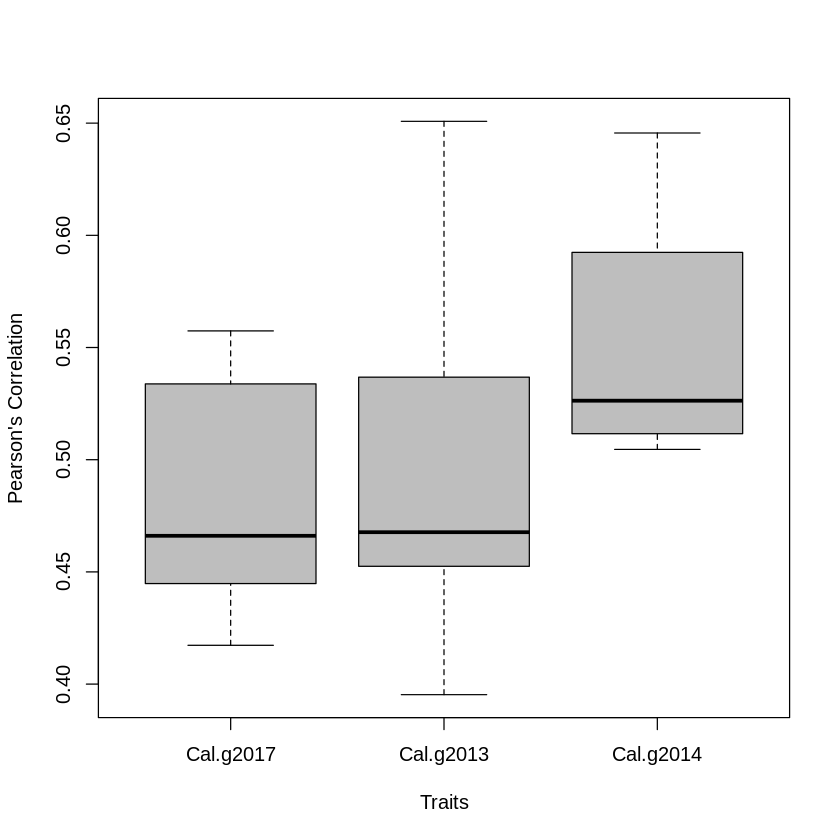

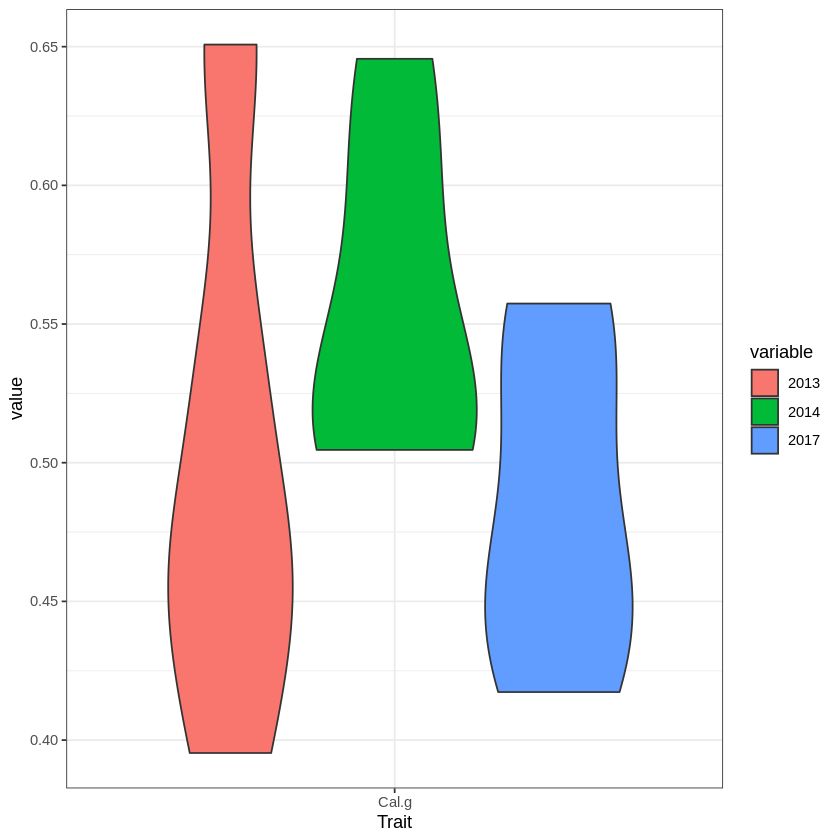

In [3]:
###### Retriving predicted and observed to make datafile
load('results/BMTME/BME/SAP_BME_CV5_Cal.g.RData')
library(reshape2)
library(ggplot2)
summary(pm)
boxplot(pm, ordered=TRUE)
#boxplot(plot.y~results$Trait,col='grey',xlab='')
results <- pm$results
Years <- c('2013','2014','2017')
parts <- c('1','2','3','4','5')

COR <- c()
for (i in 1:length(Years)){
    year <- Years[i]
    trait <- paste0('Cal.g',year)
    df <- results[results$Trait==trait,]
    
    corr <- c()
    for (j in 1: length(parts)){
        part <- parts[j]
        df2 <- df[df$Partition==part,]
        corr <- rbind(corr,cor(df2$Observed,df2$Predicted, use='complete.obs'))      
    }
    COR[[i]] <- corr
}
result <- as.data.frame(COR)
result$Trait <- 'Cal.g'
colnames(result) <- c('2013','2014','2017','Trait')
head(result)

res.m <- melt(result)
head(res.m)

ggplot(res.m, aes(x=Trait, y=value, fill=variable)) + geom_violin() + theme_bw()


In [6]:
load('data/SAP_BMTME.RData')
str(phenoBMTME)
pheno <- melt(phenoBME)
head(pheno)
head(geno)

'data.frame':	1167 obs. of  12 variables:
 $ Taxa        : Factor w/ 389 levels "PI152651","PI17548",..: 1 1 1 2 2 2 3 3 3 4 ...
 $ Year        : Factor w/ 3 levels "2013","2014",..: 1 2 3 1 2 3 1 2 3 1 ...
 $ Amylose     : num  -1.306 -0.152 0.699 0.669 0.97 ...
 $ Gross_Energy: num  -37.7718 -74.20274 0.00338 79.01422 45.82331 ...
 $ DTA         : num  -1.36 -1 -11.36 -4.9 -4.4 ...
 $ Fat         : num  -0.0394 -0.2874 0.2973 1.1639 0.5949 ...
 $ GNP         : num  -21.4 408.4 -397.1 -28.8 78.7 ...
 $ PH          : num  22.05 31.7 4.52 103.5 85.46 ...
 $ Protein     : num  -1.211 -2.409 0.939 -0.207 -0.87 ...
 $ Starch      : num  2.77 5.02 -2.67 -1.92 -1.8 ...
 $ TGW         : num  1.6 -1.37 9.29 -5.17 -4.46 ...
 $ YPP         : num  2.19 11.7 -5.39 -4.97 -8.34 ...


Using Taxa as id variables


Taxa,variable,value
PI152651,Amylose2013,-1.3060412
PI17548,Amylose2013,0.6693859
PI24969,Amylose2013,-1.2452588
PI329435,Amylose2013,-0.7893910
PI329440,Amylose2013,0.6997771
PI34911,Amylose2013,-0.1207849


,PI152651,PI17548,PI24969,PI329435,PI329440,PI34911,PI35038,PI48770,PI533750,PI533752,...,PI656116,PI656117,PI656118,PI656119,PI656120,PI656121,PI659691,PI659695,PI659696,PI659753
PI152651,1.0505116,0.6732209,0.7492774,0.7293042,0.7481660,0.8739420,0.6683061,0.8287949,0.7663571,0.7532355,...,0.7160560,0.8326498,0.8069646,0.7572217,0.8213431,0.7503748,0.8478114,0.8561871,0.8728400,0.8374285
PI17548,0.6732209,1.0505116,0.6392398,0.6503776,0.6740134,0.7085854,0.6606808,0.7550175,0.6764380,0.6553815,...,0.6281722,0.6981510,0.6874258,0.6778636,0.7015322,0.6660363,0.7262466,0.7214163,0.7217961,0.7345942
PI24969,0.7492774,0.6392398,1.0305900,0.6743651,0.7078914,0.7612641,0.6116506,0.7421398,0.7446253,0.6851419,...,0.6535291,0.7444611,0.7285680,0.6966362,0.7516973,0.6868818,0.7676936,0.8134551,0.7848389,0.7949310
PI329435,0.7293042,0.6503776,0.6743651,1.0263177,0.7020762,0.7558148,0.6370638,0.7650440,0.6909149,0.6916324,...,0.6539980,0.7610953,0.7402170,0.6985402,0.7569403,0.6911681,0.7614236,0.7493009,0.7734431,0.7468763
PI329440,0.7481660,0.6740134,0.7078914,0.7020762,1.0221252,0.7836993,0.6621533,0.8013277,0.7113429,0.7007537,...,0.6647373,0.7494603,0.7367420,0.7026249,0.7644437,0.6948589,0.7675154,0.7692693,0.7843887,0.7655739
PI34911,0.8739420,0.7085854,0.7612641,0.7558148,0.7836993,1.0307541,0.6875430,0.8543206,0.7748547,0.8014965,...,0.7494462,0.8714237,0.8428826,0.7778654,0.8671467,0.7800883,0.8655570,0.8636342,0.9107651,0.8525807


In [91]:
library(base)
library(stringr)
df <- cbind(pheno[,c(1,2)],str_split_fixed(pheno$variable, "20", 2), pheno[,3])
year <- paste0("20",df[,4])
df <- cbind(df[,c(1,3)],year,df[,5])
colnames(df) <- c('Taxa','Trait','Year','value')
head(df)
str(df)

Taxa,Trait,Year,value
PI152651,Amylose,2013,-1.3060412
PI17548,Amylose,2013,0.6693859
PI24969,Amylose,2013,-1.2452588
PI329435,Amylose,2013,-0.7893910
PI329440,Amylose,2013,0.6997771
PI34911,Amylose,2013,-0.1207849


'data.frame':	11670 obs. of  4 variables:
 $ Taxa : Factor w/ 389 levels "PI152651","PI17548",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Trait: Factor w/ 10 levels "Amylose","Cal.g",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year : Factor w/ 3 levels "2013","2014",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ value: num  -1.306 0.669 -1.245 -0.789 0.7 ...


In [106]:
#phenoBMTME <- df %>% spread(Trait, value)
head(phenoBMTME)
str(phenoBMTME)
geno <- genoBME
names(phenoBMTME)[names(phenoBMTME) == "Cal.g"] <- "Gross_Energy"
head(phenoBMTME)

Taxa,Year,Amylose,Cal.g,DTA,Fat,GNP,PH,Protein,Starch,TGW,YPP
PI152651,2013,-1.3060412,-37.771799414,-1.360837,-0.03942292,-21.39074,22.051768,-1.2111684,2.766715,1.599295,2.188733
PI152651,2014,-0.1518703,-74.202741707,-1.004093,-0.28741472,408.37601,31.698224,-2.4092873,5.018051,-1.372426,11.696527
PI152651,2017,0.6994863,0.003383857,-11.358563,0.29731826,-397.10499,4.516994,0.9393867,-2.674919,9.286168,-5.385405
PI17548,2013,0.6693859,79.014215976,-4.900773,1.16385960,-28.80067,103.499037,-0.2071979,-1.923487,-5.169072,-4.974788
PI17548,2014,0.9697520,45.823305424,-4.397471,0.59492514,78.71922,85.458193,-0.8695028,-1.801738,-4.464337,-8.338880
PI17548,2017,1.1821377,72.282107274,-5.044971,0.28326927,-93.50104,73.257725,0.2556282,-2.883531,-4.628591,-4.947095


'data.frame':	1167 obs. of  12 variables:
 $ Taxa   : Factor w/ 389 levels "PI152651","PI17548",..: 1 1 1 2 2 2 3 3 3 4 ...
 $ Year   : Factor w/ 3 levels "2013","2014",..: 1 2 3 1 2 3 1 2 3 1 ...
 $ Amylose: num  -1.306 -0.152 0.699 0.669 0.97 ...
 $ Cal.g  : num  -37.7718 -74.20274 0.00338 79.01422 45.82331 ...
 $ DTA    : num  -1.36 -1 -11.36 -4.9 -4.4 ...
 $ Fat    : num  -0.0394 -0.2874 0.2973 1.1639 0.5949 ...
 $ GNP    : num  -21.4 408.4 -397.1 -28.8 78.7 ...
 $ PH     : num  22.05 31.7 4.52 103.5 85.46 ...
 $ Protein: num  -1.211 -2.409 0.939 -0.207 -0.87 ...
 $ Starch : num  2.77 5.02 -2.67 -1.92 -1.8 ...
 $ TGW    : num  1.6 -1.37 9.29 -5.17 -4.46 ...
 $ YPP    : num  2.19 11.7 -5.39 -4.97 -8.34 ...


Taxa,Year,Amylose,Gross_Energy,DTA,Fat,GNP,PH,Protein,Starch,TGW,YPP
PI152651,2013,-1.3060412,-37.771799414,-1.360837,-0.03942292,-21.39074,22.051768,-1.2111684,2.766715,1.599295,2.188733
PI152651,2014,-0.1518703,-74.202741707,-1.004093,-0.28741472,408.37601,31.698224,-2.4092873,5.018051,-1.372426,11.696527
PI152651,2017,0.6994863,0.003383857,-11.358563,0.29731826,-397.10499,4.516994,0.9393867,-2.674919,9.286168,-5.385405
PI17548,2013,0.6693859,79.014215976,-4.900773,1.16385960,-28.80067,103.499037,-0.2071979,-1.923487,-5.169072,-4.974788
PI17548,2014,0.9697520,45.823305424,-4.397471,0.59492514,78.71922,85.458193,-0.8695028,-1.801738,-4.464337,-8.338880
PI17548,2017,1.1821377,72.282107274,-5.044971,0.28326927,-93.50104,73.257725,0.2556282,-2.883531,-4.628591,-4.947095


In [107]:
save(phenoBME,phenoBMTME,geno,file='data/SAP_BMTME.RData')